Добрый день, это работа Макаева Андрея по анализу поисковых запросов по премии "Оскар".

Работа выполнялась в Google Colaboratory, загружаем диск, вводим код авторизации, загружаем необходимые библиотеки и сам файл.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from pylab import rcParams
warnings.filterwarnings('ignore')

In [0]:
PATH="/content/gdrive/My Drive/Colab Notebooks/yandex/"
file = PATH + 'oscar'


Файл весит почти 3 Гб, много нерелевантных для задачи запросов, поэтому вытащим из него только запросы, содержащие слово '*Оскар*', '*Oscar*' или '*оскар*' в английской раскладке - '*jcrfh*' и их вариации.

In [189]:
rows_list = []
with open(file) as f:
    for line in f:
      if ('оскар' or 'oscar' or 'jcrfh' or 'Оскар' or 'Oscar') in line:
        dict1 = {}
        
        zapros,data = line.split(sep = '\t')
        dict1.update({'query':zapros})
        dict1.update({'date':pd.to_datetime(data)})
        
        rows_list.append(dict1)
df = pd.DataFrame(rows_list)
df = df.sort_values(by='date')
print (df.shape)

(7022, 2)


Теперь мы имеем только 7 тысяч запросов, которые проще анализировать, чем исходные миллионы. Посмотрим что мы получили:

In [190]:
df.head()

,date,query
1194,2019-01-22 00:11:54,купить фигурку оскар в спб
1293,2019-01-22 00:32:16,оскар кучера
173,2019-01-22 00:48:26,французский кинорежиссер сценарист оператор ак...
396,2019-01-22 00:56:31,оскар синела
398,2019-01-22 01:03:35,статуэтка оскар


In [191]:
df.tail()

,date,query
4611,2019-02-28 23:24:08,оскар 2019 смотреть на русском в хорошем качестве
2602,2019-02-28 23:30:17,оскар 2019 вся церемония
6679,2019-02-28 23:35:16,оскар 2019 номинанты
6373,2019-02-28 23:55:47,оскар ренкель голубой
6374,2019-02-28 23:56:11,оскар 2019 красная дорожка


У нас есть запросы от 22 января до 28 февраля. Церемония проходила 25 февраля.

Для анализа мы можем их разделить на три части - запросы до начала церемонии, во время церемонии и после неё.

In [169]:
feb24 = pd.to_datetime('2019-02-25 00:00:00') # до оскара
oscar_time = pd.to_datetime('2019-02-26 00:00:00') #после оскара
print (df[df['date'] < feb24].shape)
print (df.loc[(df["date"] > feb24) & (df["date"] < oscar_time)].shape)
print (df[df['date'] > oscar_time].shape)

(3676, 2)
(1961, 2)
(1385, 2)


Теперь можно посмотреть на самые популярные слова в запросах и узнать, чем интересовались пользователи в разные отрезки времени.

In [0]:
def popular_words(df,number):
  all_words = df.str.split(expand=True).unstack().value_counts()
  g = sns.barplot(x = all_words.index.values[2:number],
            y = all_words.values[2:number]);
  #plt.figure(figsize=(32, 18))
  for item in g.get_xticklabels():
    item.set_rotation(90);
rcParams['figure.figsize'] = 10, 8

In [0]:
corpus = nltk.corpus.stopwords.words('russian')
corpus.extend(['порно','оскар','оскара','оскаре','оскаров','оскарович','оскароскар'])
def wordcloud(df):
  all_words = df.str.cat()
  wordcloud = WordCloud(background_color="black", max_words=2000,
              max_font_size=40,
              stopwords=corpus).generate(all_words)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show();

# Самые популярные слова в запросах до начала церемонии

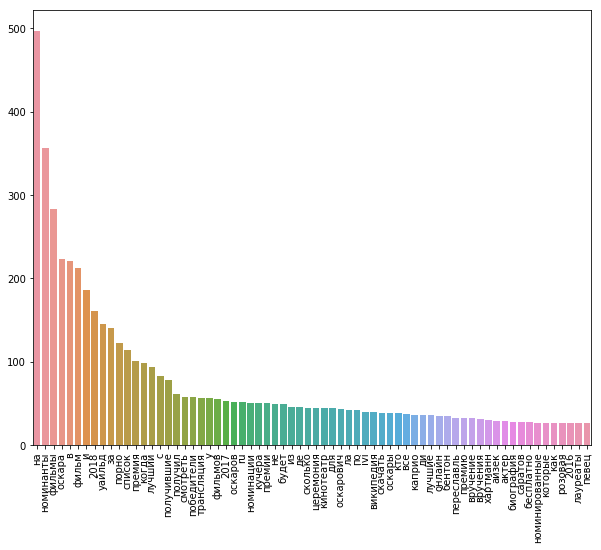

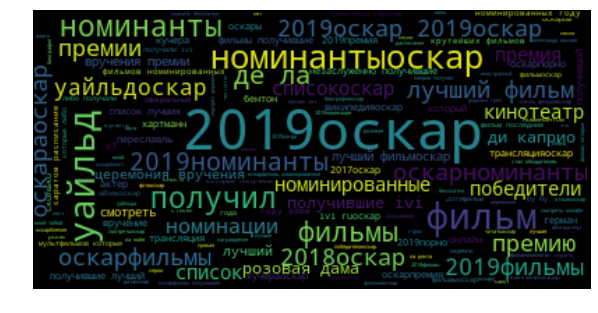

In [184]:
popular_words(df['query'][df['date']<feb24],70)
wordcloud(df['query'][df['date']<feb24])

Посмотрев на топ слов можно придти к выводу, что пользователей интересуют номинанты на различные категории, а также трансляция - её дата и время, а также где её можно будет посмотреть.

# Самые популярные слова в запросах во время церемонии

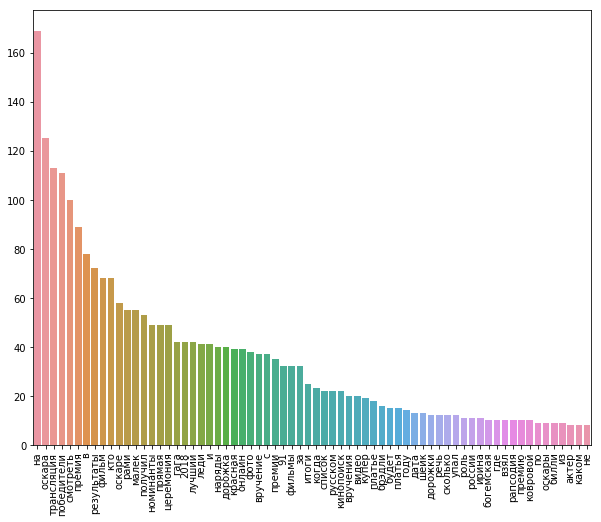

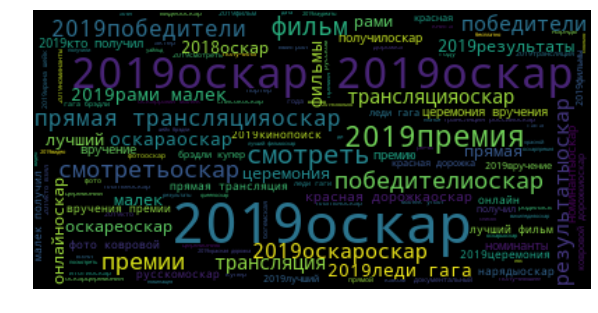

In [185]:
popular_words(df['query'].loc[(df["date"] > feb24) & (df["date"] < oscar_time)],70)
wordcloud(df['query'].loc[(df["date"] > feb24) & (df["date"] < oscar_time)])

Во время церемонии людям интересно найти прямую трансляцию, уже объявленные результаты, а также фото гостей и их нарядов. 

# Самые популярные слова в запросах после церемонии

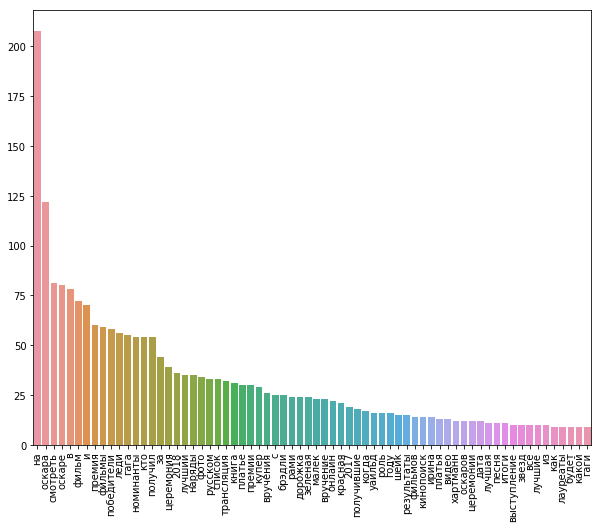

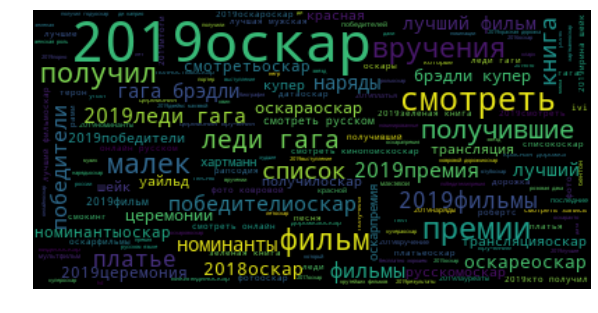

In [186]:
popular_words(df['query'][df['date']>oscar_time],70)
wordcloud(df['query'][df['date']>oscar_time])

После церемонии людям интересны итоги награждения и победители - Рами Малек, Леди Гага, Бредли Купер, а также сами фильмы.

# Заключение
Проанализировав логи поисковых запросов можно понять, что интересует пользователей, и, соответсвенно, что должно находится на странице колдунщика Оскара:


*   Перед церемонией можно вывести дату и время церемонии с обратным отсчетом до неё и список номинаций по категорям со ссылками на фильмы, актеров, режиссеров и остальных номинантов.
*   Во время церемонии людей интересуют результаты, а также трансляция, поэтому можно вывести список победителей, расписание и ссылку на онлайн-трансляцию.
*   После награждения на странице стоит разместить результаты, со ссылками на страницы актеров и фильмов на кинопоиске, где можно узнать всю необходимую информацию, а также возможно посмотреть сам фильм.

